In [1]:
import matplotlib
import pandas as pd
from dateutil.parser import *
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [15]:
# Read the CSV File into a Dataframe 
events_dataset = './events_recommender/resources/events_preclustering.csv'

In [16]:
# Load the CSV File into a Pandas Dataframe 
events_df = pd.read_csv(events_dataset)

In [17]:
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 9 columns):
event_edition_id     790 non-null int64
event_name           790 non-null object
event_category       790 non-null object
registration_type    790 non-null object
start_date           790 non-null object
end_date             790 non-null object
venue                772 non-null object
city                 772 non-null object
event_tags           687 non-null object
dtypes: int64(1), object(8)
memory usage: 55.6+ KB


In [18]:
# Map the start_date to Seasons 
def date_to_season(given_dt):    
    winter = [12,1,2]
    spring = [3,4,5]
    summer = [6,7,8]
    autumn = [9,10,11]            
    try:
        dt = parse(given_dt)
        start_month = dt.month
        
        if start_month in winter:
            return 'winter'
        elif start_month in spring:
            return 'spring'
        elif start_month in summer:
            return 'summer'
        elif start_month in autumn:
            return 'autumn'
    except Exception as err:
        return 'autumn'


In [19]:
events_df['season'] = events_df['start_date'].map(date_to_season)

In [20]:
events_df.count()

event_edition_id     790
event_name           790
event_category       790
registration_type    790
start_date           790
end_date             790
venue                772
city                 772
event_tags           687
season               790
dtype: int64

### Clustering the Events Dataset 

In [21]:
# Converting the Categorical Data to Numerical Values 
labelEncoder = LabelEncoder()

# Convert event_category 
labelEncoder.fit(events_df['event_category'])
events_df['event_category_num'] = labelEncoder.transform(events_df['event_category'])

# Convert registration_type 
labelEncoder.fit(events_df['registration_type'])
events_df['registration_type_num'] = labelEncoder.transform(events_df['registration_type'])

# Convert season 
labelEncoder.fit(events_df['season'])
events_df['season'] = labelEncoder.transform(events_df['season'])

# Drop the column start_date 
#events_df = events_df.drop('start_date',axis=1)

# Drop the registration type 
#events_df = events_df.drop('registration_type',axis=1)

#events_df = events_df.drop('event_edition_id',axis=1)

events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 12 columns):
event_edition_id         790 non-null int64
event_name               790 non-null object
event_category           790 non-null object
registration_type        790 non-null object
start_date               790 non-null object
end_date                 790 non-null object
venue                    772 non-null object
city                     772 non-null object
event_tags               687 non-null object
season                   790 non-null int64
event_category_num       790 non-null int64
registration_type_num    790 non-null int64
dtypes: int64(4), object(8)
memory usage: 74.1+ KB


In [22]:
# Do the Clustering 
tocluster_df = events_df[['event_category_num','registration_type_num','season']]
tocluster_df.info()
kmeans = KMeans(n_clusters=7)
kmeans.fit(tocluster_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 3 columns):
event_category_num       790 non-null int64
registration_type_num    790 non-null int64
season                   790 non-null int64
dtypes: int64(3)
memory usage: 18.6 KB


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [23]:
cluster_labels = kmeans.labels_
events_df['cluster'] = cluster_labels
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790 entries, 0 to 789
Data columns (total 13 columns):
event_edition_id         790 non-null int64
event_name               790 non-null object
event_category           790 non-null object
registration_type        790 non-null object
start_date               790 non-null object
end_date                 790 non-null object
venue                    772 non-null object
city                     772 non-null object
event_tags               687 non-null object
season                   790 non-null int64
event_category_num       790 non-null int64
registration_type_num    790 non-null int64
cluster                  790 non-null int32
dtypes: int32(1), int64(4), object(8)
memory usage: 77.2+ KB


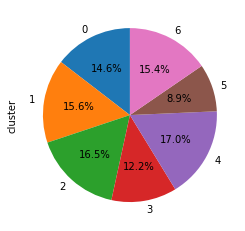

In [24]:
# Group the Events by the Cluster 
events_df.groupby('cluster')['cluster'].count().plot.pie(autopct='%1.1f%%',startangle=90)

In [25]:
# Save the Dataframe to CSV 
events_clusters = '/home/ubuntu/projects/PersonalSpace/Eventjini/retechnicaltask/events_clusters.csv'

events_df.to_csv(events_clusters,index=False)